# pumpkin pricing

In [13]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('data/US-pumpkins.csv')

pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [14]:
pumpkins['Package'].value_counts()

36 inch bins            663
24 inch bins            551
1/2 bushel cartons      234
1 1/9 bushel cartons    117
35 lb cartons            42
bushel cartons           37
40 lb cartons            19
1 1/9 bushel crates      17
each                     17
bins                     13
50 lb sacks              11
50 lb cartons            10
bushel baskets           10
22 lb cartons            10
20 lb cartons             6
Name: Package, dtype: int64

In [15]:
# loai bo cac dong co package la bushel
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
 
# chon mot so cot
columns_to_select = ['Package', 'Variety', 'City Name', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

# tinh gia trung binh
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

# chuyen ngay thang sang day thang
month = pd.DatetimeIndex(pumpkins['Date']).month
# tinh so ngay
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()

,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


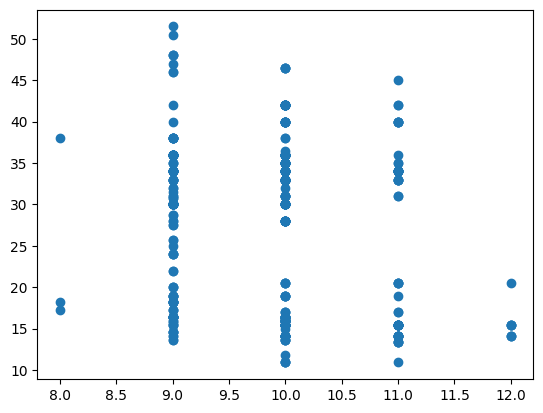

In [16]:
import matplotlib.pyplot as plt
plt.scatter('Month','Price',data=new_pumpkins)

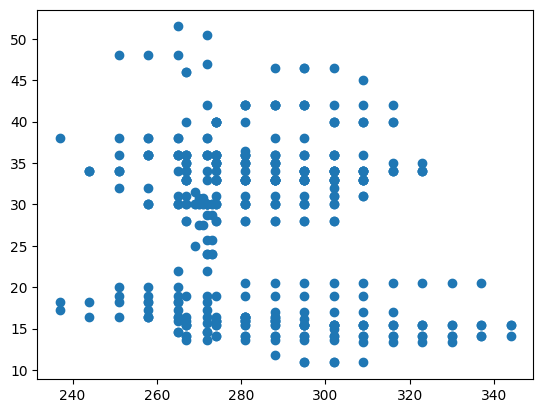

In [17]:

plt.scatter('DayOfYear','Price',data=new_pumpkins)

# Linear regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int64  
 1   DayOfYear   144 non-null    int64  
 2   Variety     144 non-null    object 
 3   City        144 non-null    object 
 4   Package     144 non-null    object 
 5   Low Price   144 non-null    float64
 6   High Price  144 non-null    float64
 7   Price       144 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 10.1+ KB


/tmp/ipykernel_18996/1215059379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


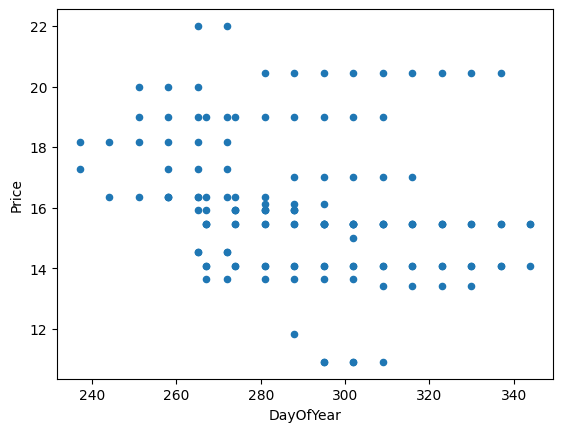

In [21]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear','Price')
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()


In [24]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# define LinearRegression and fit model
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

# predict model using linear regression
pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.77 (17.2%)
Model determination:  0.04460606335028361


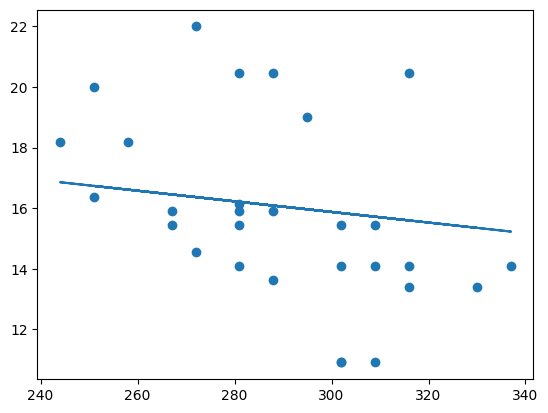

In [25]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

# Polynomial Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_test,y_test)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Mean error: 2.59 (16.4%)
Model determination:  -0.15256314328010956


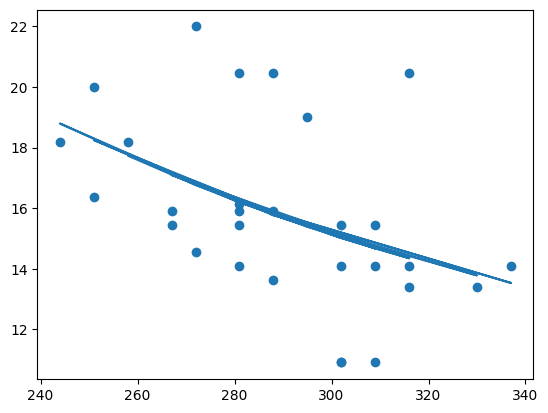

In [ ]:
# predict model using linear regression
pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

In [ ]:
# chuyen du lieu chuoi thanh cac cot
pd.get_dummies(new_pumpkins['Variety'])
# new_pumpkins['Variety'].value_counts()

,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
70,0,0,0,1
71,0,0,0,1
72,0,0,0,1
73,0,0,0,1
74,0,0,0,1
...,...,...,...,...
1738,0,1,0,0
1739,0,1,0,0
1740,0,1,0,0
1741,0,1,0,0


In [ ]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']
print(X)

      FAIRYTALE  MINIATURE  MIXED HEIRLOOM VARIETIES  PIE TYPE  Month  \
70            0          0                         0         1      9   
71            0          0                         0         1      9   
72            0          0                         0         1     10   
73            0          0                         0         1     10   
74            0          0                         0         1     10   
...         ...        ...                       ...       ...    ...   
1738          0          1                         0         0      9   
1739          0          1                         0         0      9   
1740          0          1                         0         0      9   
1741          0          1                         0         0      9   
1742          0          1                         0         0      9   

      ATLANTA  BALTIMORE  BOSTON  CHICAGO  COLUMBIA  DETROIT  NEW YORK  \
70          0          1       0        0        

In [39]:

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# setup and train the pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

# predict results for test data
pred = pipeline.predict(X_test)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.23 (8.28%)
Model determination:  0.9652659492293556


![alt text](image.png)

# logistic regression

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
full_pumpkins = pd.read_csv('data/US-pumpkins.csv')
columns_to_select = ['City Name','Package','Variety', 'Origin','Item Size', 'Color']
pumpkins = full_pumpkins.loc[:, columns_to_select]

pumpkins.dropna(inplace=True)
print(pumpkins)
X = pumpkins[pumpkins.columns.difference(['Color'])]

# su dung columntransformer ap dung ma hoa cho cac cot thich hop
from sklearn.compose import ColumnTransformer


item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

ct = ColumnTransformer(transformers=[
    ('ord', ordinal_encoder, ordinal_features),
    ('cat', categorical_encoder, categorical_features)
    ])

ct.set_output(transform='pandas')
X = ct.fit_transform(X)

y = pumpkins['Color']
y = LabelEncoder().fit_transform(y)

print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


      City Name       Package            Variety    Origin Item Size   Color
2     BALTIMORE  24 inch bins        HOWDEN TYPE  DELAWARE       med  ORANGE
3     BALTIMORE  24 inch bins        HOWDEN TYPE  VIRGINIA       med  ORANGE
4     BALTIMORE  24 inch bins        HOWDEN TYPE  MARYLAND       lge  ORANGE
5     BALTIMORE  24 inch bins        HOWDEN TYPE  MARYLAND       lge  ORANGE
6     BALTIMORE  36 inch bins        HOWDEN TYPE  MARYLAND       med  ORANGE
...         ...           ...                ...       ...       ...     ...
1694  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1695  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1696  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1697  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE
1698  ST. LOUIS  24 inch bins  HOWDEN WHITE TYPE  ILLINOIS      xlge   WHITE

[991 rows x 6 columns]
      ord__Item Size  cat__City Name_ATLANTA  cat__C

In [52]:
from sklearn.metrics import f1_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
F1-score:  0.7457627118644068


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 11,  22]])

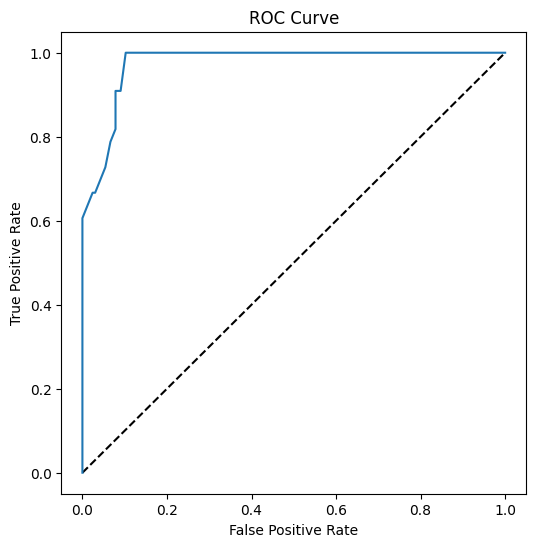

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [55]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.9749908725812341
